In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing

In [ ]:
# Loading built-in California housing dataset
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Price'] = data.target

In [3]:
# Features and target
X = df.drop(columns=['Price']).values
y = df['Price'].values.reshape(-1, 1)

In [6]:
# Normalising features
SS = StandardScaler()
X = SS.fit_transform(X)

In [7]:
# Splitting into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [8]:
# Converting data into tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

In [18]:
# Building regression model
class HousingPriceModel(nn.Module):
    def __init__(self, input_size):
        super(HousingPriceModel, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [19]:
# Initialising model, loss function, and optimiser
model = HousingPriceModel(input_size=X_train.shape[1])
lossf = nn.MSELoss()
optimiser = optim.Adam(model.parameters(), lr=0.01)

In [20]:
# Training the model
epochs = 1000
for epoch in range(epochs):
    model.train()
    optimiser.zero_grad()
    outputs = model(X_train_tensor)
    loss = lossf(outputs, y_train_tensor)
    loss.backward()
    optimiser.step()
    
    if (epoch+1) % 100 == 0:
        print(f'Epoch: {epoch+1}/{epochs} - Loss: {loss.item():.5f}')

Epoch: 100/1000 - Loss: 0.36447
Epoch: 200/1000 - Loss: 0.30278
Epoch: 300/1000 - Loss: 0.27587
Epoch: 400/1000 - Loss: 0.26146
Epoch: 500/1000 - Loss: 0.25252
Epoch: 600/1000 - Loss: 0.24644
Epoch: 700/1000 - Loss: 0.24891
Epoch: 800/1000 - Loss: 0.24491
Epoch: 900/1000 - Loss: 0.24145
Epoch: 1000/1000 - Loss: 0.23229


In [24]:
# Evaluating model
model.eval()
with torch.no_grad():
    predictions = model(X_test_tensor)
    test_loss = lossf(predictions, y_test_tensor).item()
print(f'Test Mean Squared Error: {test_loss:.5f}')

predicted_prices = predictions.numpy()
actual_prices = y_test_tensor.numpy()

Test Mean Squared Error: 0.24257


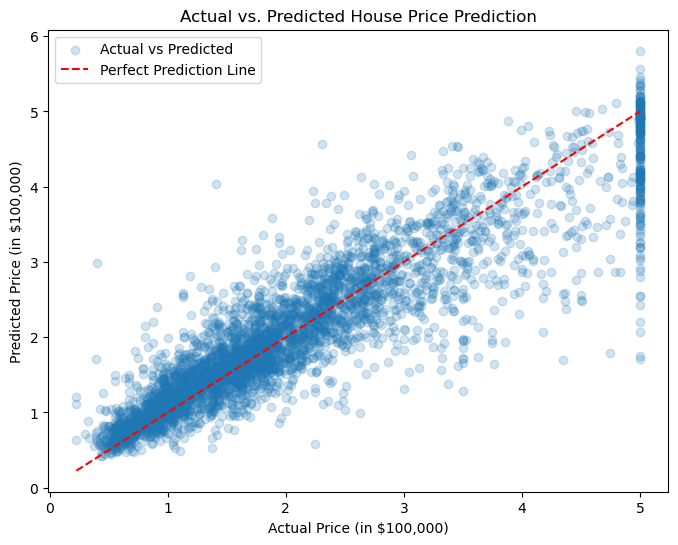

In [34]:
# Scatter plot for comparison
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(actual_prices, predictions, alpha=0.2, label="Actual vs Predicted")
plt.plot([actual_prices.min(), actual_prices.max()], [actual_prices.min(), actual_prices.max()], 'r--', label="Perfect Prediction Line")
plt.xlabel("Actual Price (in $100,000)")
plt.ylabel("Predicted Price (in $100,000)")
plt.legend()
plt.title("Actual vs. Predicted House Price Prediction")
plt.show()